In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_x = pd.read_csv('../../data/x_train_extra.csv')
train_y = pd.read_csv('../../data/y_train_extra.csv')
valid_x = pd.read_csv('../../data/x_valid_extra.csv')
valid_y = pd.read_csv('../../data/y_valid_extra.csv')
test_x = pd.read_csv('../../data/x_test_extra.csv')
test_y = pd.read_csv('../../data/y_test_extra.csv')

In [4]:
random_seed=1

In [5]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('PotentialFraud', 1)]


In [6]:
train_array_x = X_resampled.to_numpy()
train_array_y = y_resampled.to_numpy()
valid_array_x = valid_x.to_numpy()
valid_array_y = valid_y.to_numpy()
array_x = np.concatenate([train_array_x,valid_array_x],axis=0)
array_y = np.concatenate([train_array_y,valid_array_y],axis=0)
test_fold = np.concatenate([np.array(train_array_x.shape[0]*[-1,]),np.array(valid_array_x.shape[0]*[0,])],axis=0)

In [7]:
from sklearn.model_selection import PredefinedSplit

In [8]:
ps = PredefinedSplit(test_fold=test_fold)

In [9]:
import warnings
warnings.filterwarnings("ignore")

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [11]:
from sklearn.metrics import precision_score,recall_score,ConfusionMatrixDisplay,confusion_matrix,f1_score

In [12]:
from sklearn.model_selection import GridSearchCV

## Selection Based on F1 Scores

In [13]:
tree = DecisionTreeClassifier(random_state=random_seed)
tree_grid = GridSearchCV(tree,param_grid={'max_depth':[3,10,20,50],'min_samples_leaf':[2,6,10,20],
                                          'max_features':[None,'sqrt','log2',5,10,20]},
                        scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
tree_grid.fit(array_x,array_y)

Fitting 1 folds for each of 96 candidates, totalling 96 fits
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2; accuracy: (test=0.878) f1: (test=0.459) precision: (test=0.341) recall: (test=0.700) total time=   0.2s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=6; accuracy: (test=0.878) f1: (test=0.459) precision: (test=0.341) recall: (test=0.700) total time=   0.2s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10; accuracy: (test=0.878) f1: (test=0.459) precision: (test=0.341) recall: (test=0.700) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20; accuracy: (test=0.878) f1: (test=0.459) precision: (test=0.341) recall: (test=0.700) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=2; accuracy: (test=0.817) f1: (test=0.407) precision: (test=0.268) recall: (test=0.850) total time=   0.0s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6; accuracy: (test=0.817) f1: 

[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=6; accuracy: (test=0.869) f1: (test=0.372) precision: (test=0.288) recall: (test=0.525) total time=   0.5s
[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   0.5s
[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20; accuracy: (test=0.871) f1: (test=0.397) precision: (test=0.303) recall: (test=0.575) total time=   0.4s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=2; accuracy: (test=0.880) f1: (test=0.404) precision: (test=0.319) recall: (test=0.550) total time=   0.1s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6; accuracy: (test=0.852) f1: (test=0.355) precision: (test=0.262) recall: (test=0.550) total time=   0.1s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10; accuracy: (test=0.856) f1: (test=0.400) precision: (test=0.289) recall: (test=0.6

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 10, 20, 50],
                         'max_features': [None, 'sqrt', 'log2', 5, 10, 20],
                         'min_samples_leaf': [2, 6, 10, 20]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [14]:
tree_resampled = tree_grid.best_estimator_

In [15]:
f1_score(y_resampled,tree_resampled.predict(X_resampled))

0.9531110259358629

In [16]:
f1_score(test_y,tree_resampled.predict(test_x))

0.5454545454545455

In [17]:
tree_resampled

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=1)

Accuracy Score

In [18]:
tree_resampled.score(X_resampled,y_resampled)

0.9531409601634321

In [19]:
tree_resampled.score(test_x,test_y)

0.88909426987061

Recall Score

In [20]:
recall_score(y_resampled,tree_resampled.predict(X_resampled))

0.9525025536261491

In [21]:
recall_score(test_y,tree_resampled.predict(test_x))

0.6666666666666666

Precision Score

In [22]:
precision_score(y_resampled,tree_resampled.predict(X_resampled))

0.9537202761442086

In [23]:
precision_score(test_y,tree_resampled.predict(test_x))

0.46153846153846156

In [24]:
pd.Series(tree_resampled.predict(test_x)).value_counts()

0.0    463
1.0     78
dtype: int64

In [25]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
roc_auc_score(y_resampled,tree_resampled.predict(X_resampled))

0.9531409601634322

In [28]:
roc_auc_score(test_y,tree_resampled.predict(test_x))

0.7902121834360026

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Selection Based on F1 Scores

In [30]:
lr = LogisticRegression(random_state=1)
lr_grid = GridSearchCV(lr,param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                                       'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                       'max_iter':[5,10,20,50,100]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
lr_grid.fit(array_x,array_y)

Fitting 1 folds for each of 100 candidates, totalling 100 fits
[CV 1/1] END max_iter=5, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=liblinear; accuracy: (test=0.850) f1: (test=0.400) precision: (test=0.284) recall: (test=0.675) total time=   0.1s
[CV 1/1] END max_iter=5, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=saga; accuracy: (test=0.826) f1: (test=0.356) precision: (test=0.245) recall: (test=0.650) total time=   0.1s
[CV 1/1] END max_iter=5, penalty=l2, solver=newton-cg; accuracy: (test=0.884) f1: (test=0.442) precision: (test=0.342) recall: (test=0.625) total time=   0.0s
[CV 1/1] END max_iter=

[CV 1/1] END max_iter=20, penalty=none, solver=lbfgs; accuracy: (test=0.869) f1: (test=0.450) precision: (test=0.326) recall: (test=0.725) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=none, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=none, solver=sag; accuracy: (test=0.860) f1: (test=0.367) precision: (test=0.275) recall: (test=0.550) total time=   0.2s
[CV 1/1] END max_iter=20, penalty=none, solver=saga; accuracy: (test=0.863) f1: (test=0.393) precision: (test=0.293) recall: (test=0.600) total time=   0.2s
[CV 1/1] END max_iter=50, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=liblinear; accuracy: (test=0.8

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [5, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [31]:
lr_resampled = lr_grid.best_estimator_

In [32]:
f1_score(y_resampled,lr_resampled.predict(X_resampled))

0.7939237603897964

In [33]:
f1_score(test_y,lr_resampled.predict(test_x))

0.5891472868217054

In [34]:
lr_resampled

LogisticRegression(random_state=1, solver='sag')

Accuracy Score

In [35]:
lr_resampled = lr_grid.best_estimator_
lr_resampled.score(X_resampled,y_resampled)

0.816394279877426

In [36]:
lr_resampled.score(test_x,test_y)

0.9020332717190388

Recall Score

In [37]:
recall_score(y_resampled,lr_resampled.predict(X_resampled))

0.7073544433094995

In [38]:
recall_score(test_y,lr_resampled.predict(test_x))

0.7037037037037037

Precision Score

In [39]:
precision_score(y_resampled,lr_resampled.predict(X_resampled))

0.9046374918354017

In [40]:
precision_score(test_y,lr_resampled.predict(test_x))

0.5066666666666667

In [41]:
pd.Series(lr_resampled.predict(test_x)).value_counts()

0.0    466
1.0     75
dtype: int64

In [42]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [43]:
roc_auc_score(y_resampled,lr_resampled.predict(X_resampled))

0.8163942798774259

In [44]:
roc_auc_score(test_y,lr_resampled.predict(test_x))

0.813864172180394

<Figure size 1440x720 with 0 Axes>

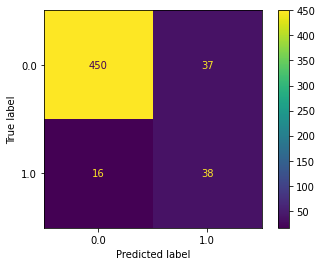

In [45]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,lr_resampled.predict(test_x),labels=lr_resampled.classes_),display_labels=lr_resampled.classes_)
cm.plot()
plt.show()

# XGB

In [46]:
from xgboost import XGBClassifier

In [48]:
xgb = XGBClassifier(random_state=1)
xgb_grid = GridSearchCV(xgb,param_grid = {'n_estimators':[100,300],
                                       'max_depth':[3,10],'min_child_weight':[0.2,0.5],
                                         'eta':[0.2,0.5]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
xgb_grid.fit(array_x,array_y)

Fitting 1 folds for each of 16 candidates, totalling 16 fits
[19:23:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.900) f1: (test=0.500) precision: (test=0.397) recall: (test=0.675) total time=   1.4s
[19:23:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.924) f1: (test=0.549) precision: (test=0.490) recall: (test=0.625) total time=   4.3s
[19:23:14] WARNIN

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_we...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                          

F1 Score

In [49]:
xgb_resampled = xgb_grid.best_estimator_

In [50]:
f1_score(y_resampled,xgb_resampled.predict(X_resampled))

1.0

In [51]:
f1_score(test_y,xgb_resampled.predict(test_x))

0.5904761904761905

In [52]:
xgb_resampled

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.5, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=3, min_child_weight=0.2, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy Score

In [53]:
xgb_resampled = xgb_grid.best_estimator_
xgb_resampled.score(X_resampled,y_resampled)

1.0

In [54]:
xgb_resampled.score(test_x,test_y)

0.9205175600739371

Recall Score

In [55]:
recall_score(y_resampled,xgb_resampled.predict(X_resampled))

1.0

In [56]:
recall_score(test_y,xgb_resampled.predict(test_x))

0.5740740740740741

Precision Score

In [57]:
precision_score(y_resampled,xgb_resampled.predict(X_resampled))

1.0

In [58]:
precision_score(test_y,xgb_resampled.predict(test_x))

0.6078431372549019

In [59]:
pd.Series(xgb_resampled.predict(test_x)).value_counts()

0.0    490
1.0     51
dtype: int64

In [60]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_resampled,xgb_resampled.predict(X_resampled))

1.0

In [63]:
roc_auc_score(test_y,xgb_resampled.predict(test_x))

0.7665031561335462

<Figure size 1440x720 with 0 Axes>

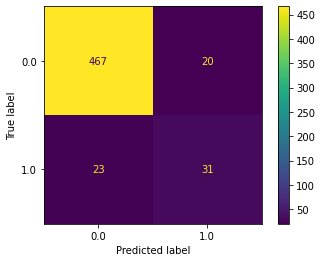

In [64]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,xgb_resampled.predict(test_x),labels=xgb_resampled.classes_),display_labels=xgb_resampled.classes_)
cm.plot()
plt.show()

# Random Forest

## Without Adding Graph Features

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(random_state=1)
rf_grid = GridSearchCV(rf,param_grid = {'n_estimators':[50,100],
                                       'max_depth':[10,20],'min_samples_leaf':[6,10],
                                          'max_features':['sqrt',10,20]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
rf_grid.fit(array_x,array_y)

Fitting 1 folds for each of 24 candidates, totalling 24 fits
[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.884) f1: (test=0.471) precision: (test=0.354) recall: (test=0.700) total time=   1.4s
[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.885) f1: (test=0.483) precision: (test=0.362) recall: (test=0.725) total time=   2.7s
[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.887) f1: (test=0.479) precision: (test=0.364) recall: (test=0.700) total time=   1.4s
[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.880) f1: (test=0.463) precision: (test=0.346) recall: (test=0.700) total time=   2.8s
[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.884) f1: (test=0.479) precision: (test=0.358) recall: (test=0.725) total time=   1.8s
[C

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 10, 20],
                         'min_samples_leaf': [6, 10],
                         'n_estimators': [50, 100]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [67]:
rf_resampled = rf_grid.best_estimator_

In [68]:
f1_score(y_resampled,rf_resampled.predict(X_resampled))

0.9700628930817611

In [69]:
f1_score(test_y,rf_resampled.predict(test_x))

0.6363636363636364

In [70]:
rf_resampled

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=6,
                       n_estimators=50, random_state=1)

Accuracy Score

In [71]:
rf_resampled = rf_grid.best_estimator_
rf_resampled.score(X_resampled,y_resampled)

0.969611848825332

In [72]:
rf_resampled.score(test_x,test_y)

0.911275415896488

Recall Score

In [73]:
recall_score(y_resampled,rf_resampled.predict(X_resampled))

0.9846782431052093

In [74]:
recall_score(test_y,rf_resampled.predict(test_x))

0.7777777777777778

Precision Score

In [75]:
precision_score(y_resampled,rf_resampled.predict(X_resampled))

0.9558750619732276

In [76]:
precision_score(test_y,rf_resampled.predict(test_x))

0.5384615384615384

In [77]:
pd.Series(rf_resampled.predict(test_x)).value_counts()

0.0    463
1.0     78
dtype: int64

In [78]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
roc_auc_score(y_resampled,rf_resampled.predict(X_resampled))

0.969611848825332

In [81]:
roc_auc_score(test_y,rf_resampled.predict(test_x))

0.8519279032626055

<Figure size 1440x720 with 0 Axes>

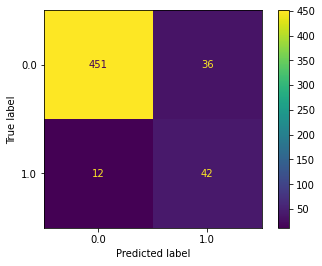

In [82]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,rf_resampled.predict(test_x),labels=rf_resampled.classes_),display_labels=rf_resampled.classes_)
cm.plot()
plt.show()